In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df = pd.read_csv("/content/drive/MyDrive/Fraud_Detection/Fraud.csv")
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [4]:
## Introductory Data Analysis

In [5]:
df.shape

(6362620, 11)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [7]:
# The dataset contains 11 columns and 6362620 rows
# out of 11 columns 5 is of float , 3 is of int , and 3 is of object or string

## Data Cleaning

In [8]:
df.isnull().sum()

,0
step,0
type,0
amount,0
nameOrig,0
oldbalanceOrg,0
newbalanceOrig,0
nameDest,0
oldbalanceDest,0
newbalanceDest,0
isFraud,0


In [ ]:
## no null value is present in the dataset

In [9]:
df.isFraud.value_counts()

,count
isFraud,
0,6354407
1,8213


In [10]:
## class imbalance is there we have to go for undersampling

In [11]:
df.isFlaggedFraud.value_counts()

,count
isFlaggedFraud,
0,6362604
1,16


In [12]:
print('percentage of 1 in isFlaggedFraud is :',(df.isFlaggedFraud.value_counts()[1]/df.shape[0])*100)

percentage of 1 in isFlaggedFraud is : 0.000251468734577894


In [13]:
## isFlaggedFraud does not contribute anything to the prediction as it does not have any relation or pattern
## we need to drop it

In [14]:
df.duplicated().sum()

0

In [15]:
## data does not contain any duplicates records

In [16]:
## Elementary Data Analysis

In [17]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [18]:
df.dtypes

,0
step,int64
type,object
amount,float64
nameOrig,object
oldbalanceOrg,float64
newbalanceOrig,float64
nameDest,object
oldbalanceDest,float64
newbalanceDest,float64
isFraud,int64


In [19]:
df.nunique()

,0
step,743
type,5
amount,5316900
nameOrig,6353307
oldbalanceOrg,1845844
newbalanceOrig,2682586
nameDest,2722362
oldbalanceDest,3614697
newbalanceDest,3555499
isFraud,2


In [20]:
num_col = []
cat_col = []
for col in list(df.columns):
  if df[col].dtypes == 'object':
    cat_col.append(col)
  else:
    num_col.append(col)

In [21]:
len(num_col),len(cat_col)

(8, 3)

In [22]:
num_col

['step',
 'amount',
 'oldbalanceOrg',
 'newbalanceOrig',
 'oldbalanceDest',
 'newbalanceDest',
 'isFraud',
 'isFlaggedFraud']

In [23]:
## Univariate_Analysis

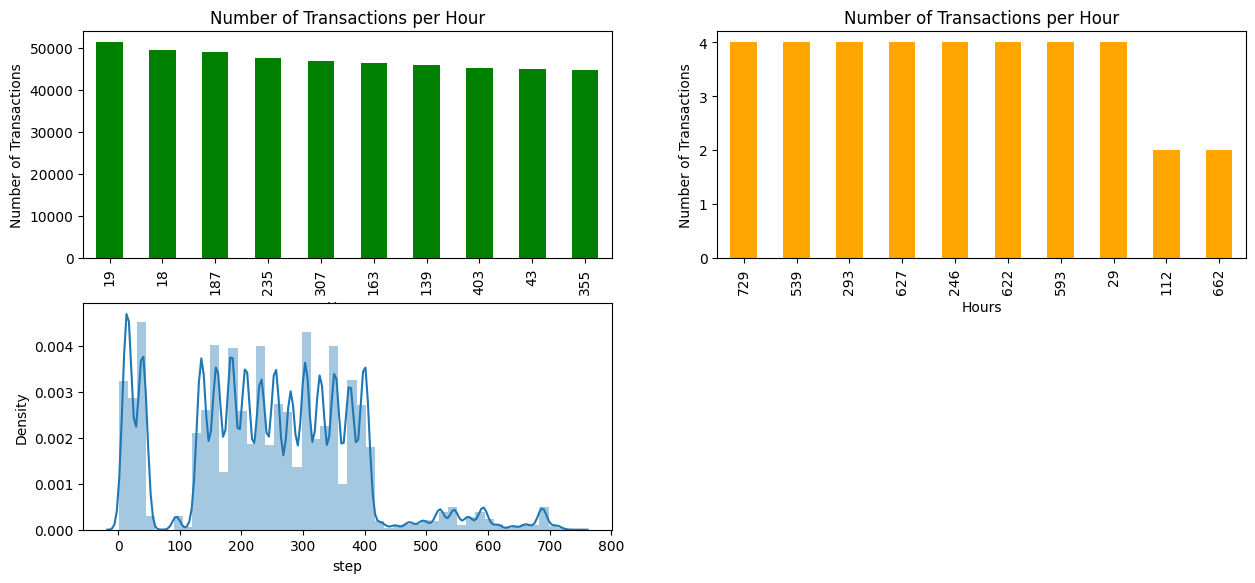

In [24]:
plt.figure(figsize=(15,10))
plt.subplot(3,2,1)
df.step.value_counts().sort_values(ascending=False)[:10].plot.bar(color='green')
plt.xlabel("Hours")
plt.ylabel("Number of Transactions")
plt.title("Number of Transactions per Hour")
plt.subplot(3,2,2)
df.step.value_counts().sort_values(ascending=False)[-10:].plot.bar(color='orange')
plt.xlabel("Hours")
plt.ylabel("Number of Transactions")
plt.title("Number of Transactions per Hour")
plt.subplot(3,2,3)
sns.distplot(df.step)
plt.show()

In [ ]:
## Analysis : Maximum number of transaction occours within 24 hours of day 1 of each month
            # Minimum number of transaction occours on 4 day and 27 day of the month

In [ ]:
## Number of transactions per hour

In [25]:
print(f'Average Transaction per hour : {df.step.value_counts().sum()/743}')

Average Transaction per hour : 8563.418573351279


In [26]:
df[num_col[:-2]].describe().T

,count,mean,std,min,25%,50%,75%,max
step,6362620.0,2.433972e+02,1.423320e+02,1.0,156.00,239.000,3.350000e+02,7.430000e+02
amount,6362620.0,1.798619e+05,6.038582e+05,0.0,13389.57,74871.940,2.087215e+05,9.244552e+07
oldbalanceOrg,6362620.0,8.338831e+05,2.888243e+06,0.0,0.00,14208.000,1.073152e+05,5.958504e+07
newbalanceOrig,6362620.0,8.551137e+05,2.924049e+06,0.0,0.00,0.000,1.442584e+05,4.958504e+07
oldbalanceDest,6362620.0,1.100702e+06,3.399180e+06,0.0,0.00,132705.665,9.430367e+05,3.560159e+08
newbalanceDest,6362620.0,1.224996e+06,3.674129e+06,0.0,0.00,214661.440,1.111909e+06,3.561793e+08


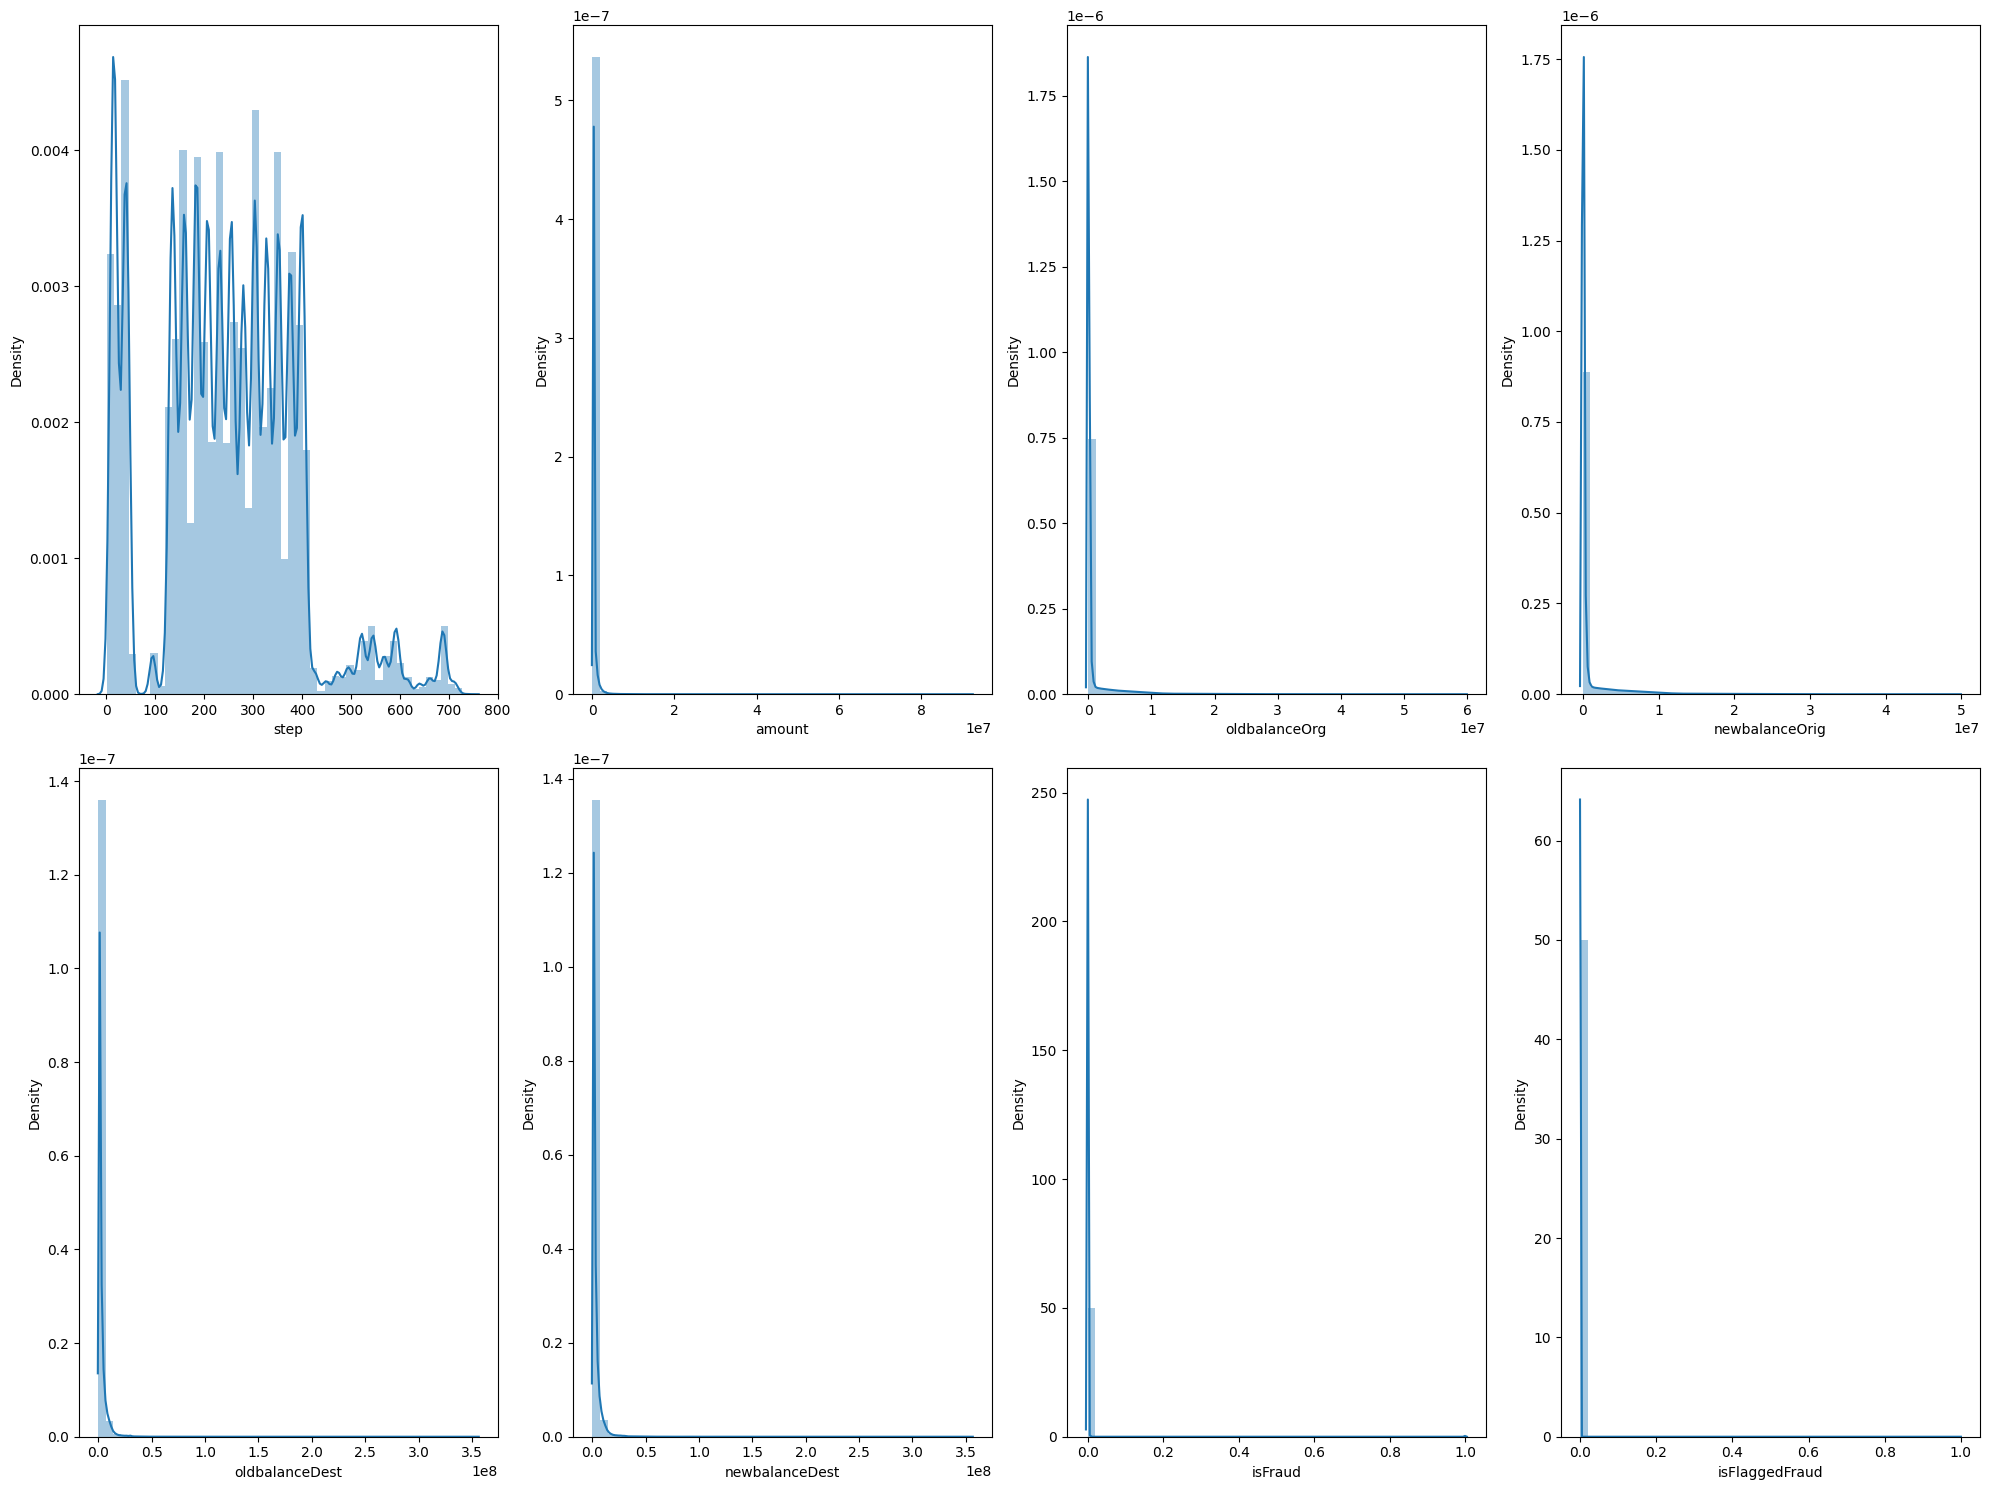

In [ ]:
plt.figure(figsize=(20,15))
plotnumber = 1

for col in num_col:
    if plotnumber<=len(num_col):
        ax = plt.subplot(2, 4, plotnumber)
        sns.distplot(df[col])
        plt.xlabel(col)
    plotnumber+=1

plt.tight_layout()
plt.show()

In [ ]:
### Amount


## 75% transaction are greater than 1.33*10^4 and 25% transactions are greater than 2.08 * 10^5
## Maximum amount in transaction is  : 9,24 * 10^7
## average  amount : 1.79 * 10^5

### oldbalanceOrg

## more than 50 % customers have initial balance before transaction is greater than or equal to 1.42 * 10^4
## More than 25% customers have initial balance before transaction is greater than or equal to 1.07 * 10 ^5
## Maximum balance before transaction is : 5.95 * 10^7


### newbalanceOrg

## More than 25% customers have balance after transaction is greater than or equal to 1.44*10^5
## Maximum balance after transaction is : 4.95*10^7


### oldbalanceDest

## 50% recipients have initial balance before the transaction greater than equal to  1.32 * 10^5
## 25 % recipients have initial balance greater than or equal to 9.43 * 10^5
## Maximum balance before transaction is : 3.56 * 10^8



### newbalalnceDest

## 50% recipients have initial balance before the transaction greater than equal to  2.14 * 10^5
## 25 % recipients have initial balance greater than or equal to 1.11 * 10^6
## Maximum balance before transaction is : 3.56 * 10^8

In [ ]:
## Is_Fraud

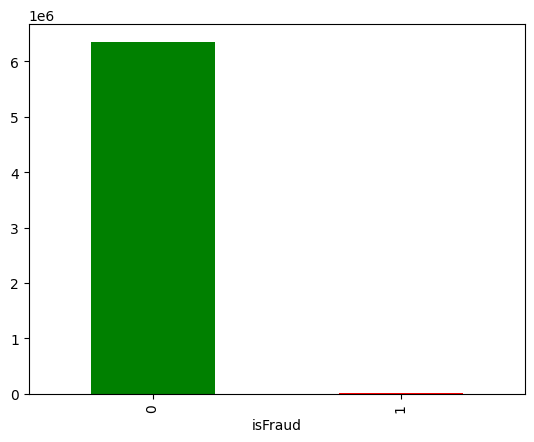

In [ ]:
df.isFraud.value_counts().plot(kind='bar',color=['green','red'])
plt.show()

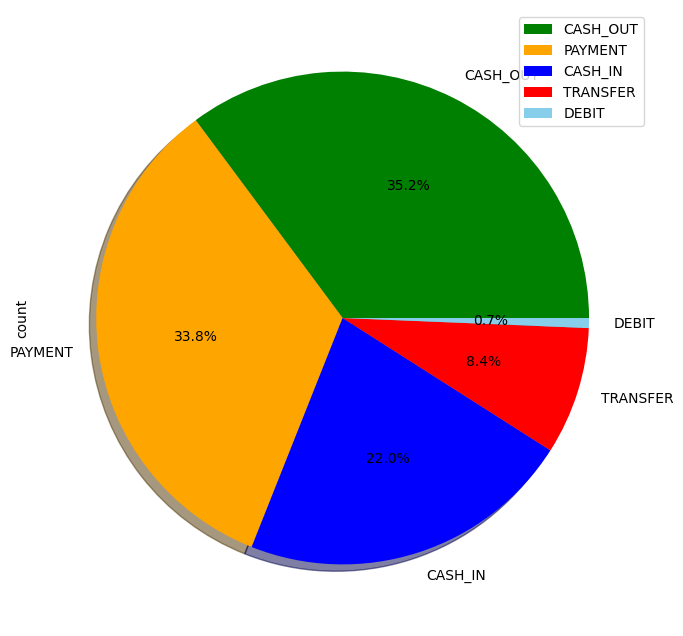

In [ ]:
plt.figure(figsize=(8,8))
df['type'].value_counts().plot(kind='pie',autopct='%1.1f%%',colors=['green','orange','blue','red','skyblue'],legend=True,shadow=True)
plt.show()

In [ ]:
## 35% transaction are of cash_out type
## 34% transaction are of Payment type
## 22% transaction are of cash_in type
## 9%  transaction are of transfer type
## <1% transaction are of debit type

## Bivariate Analysis

In [ ]:
## step VS amount

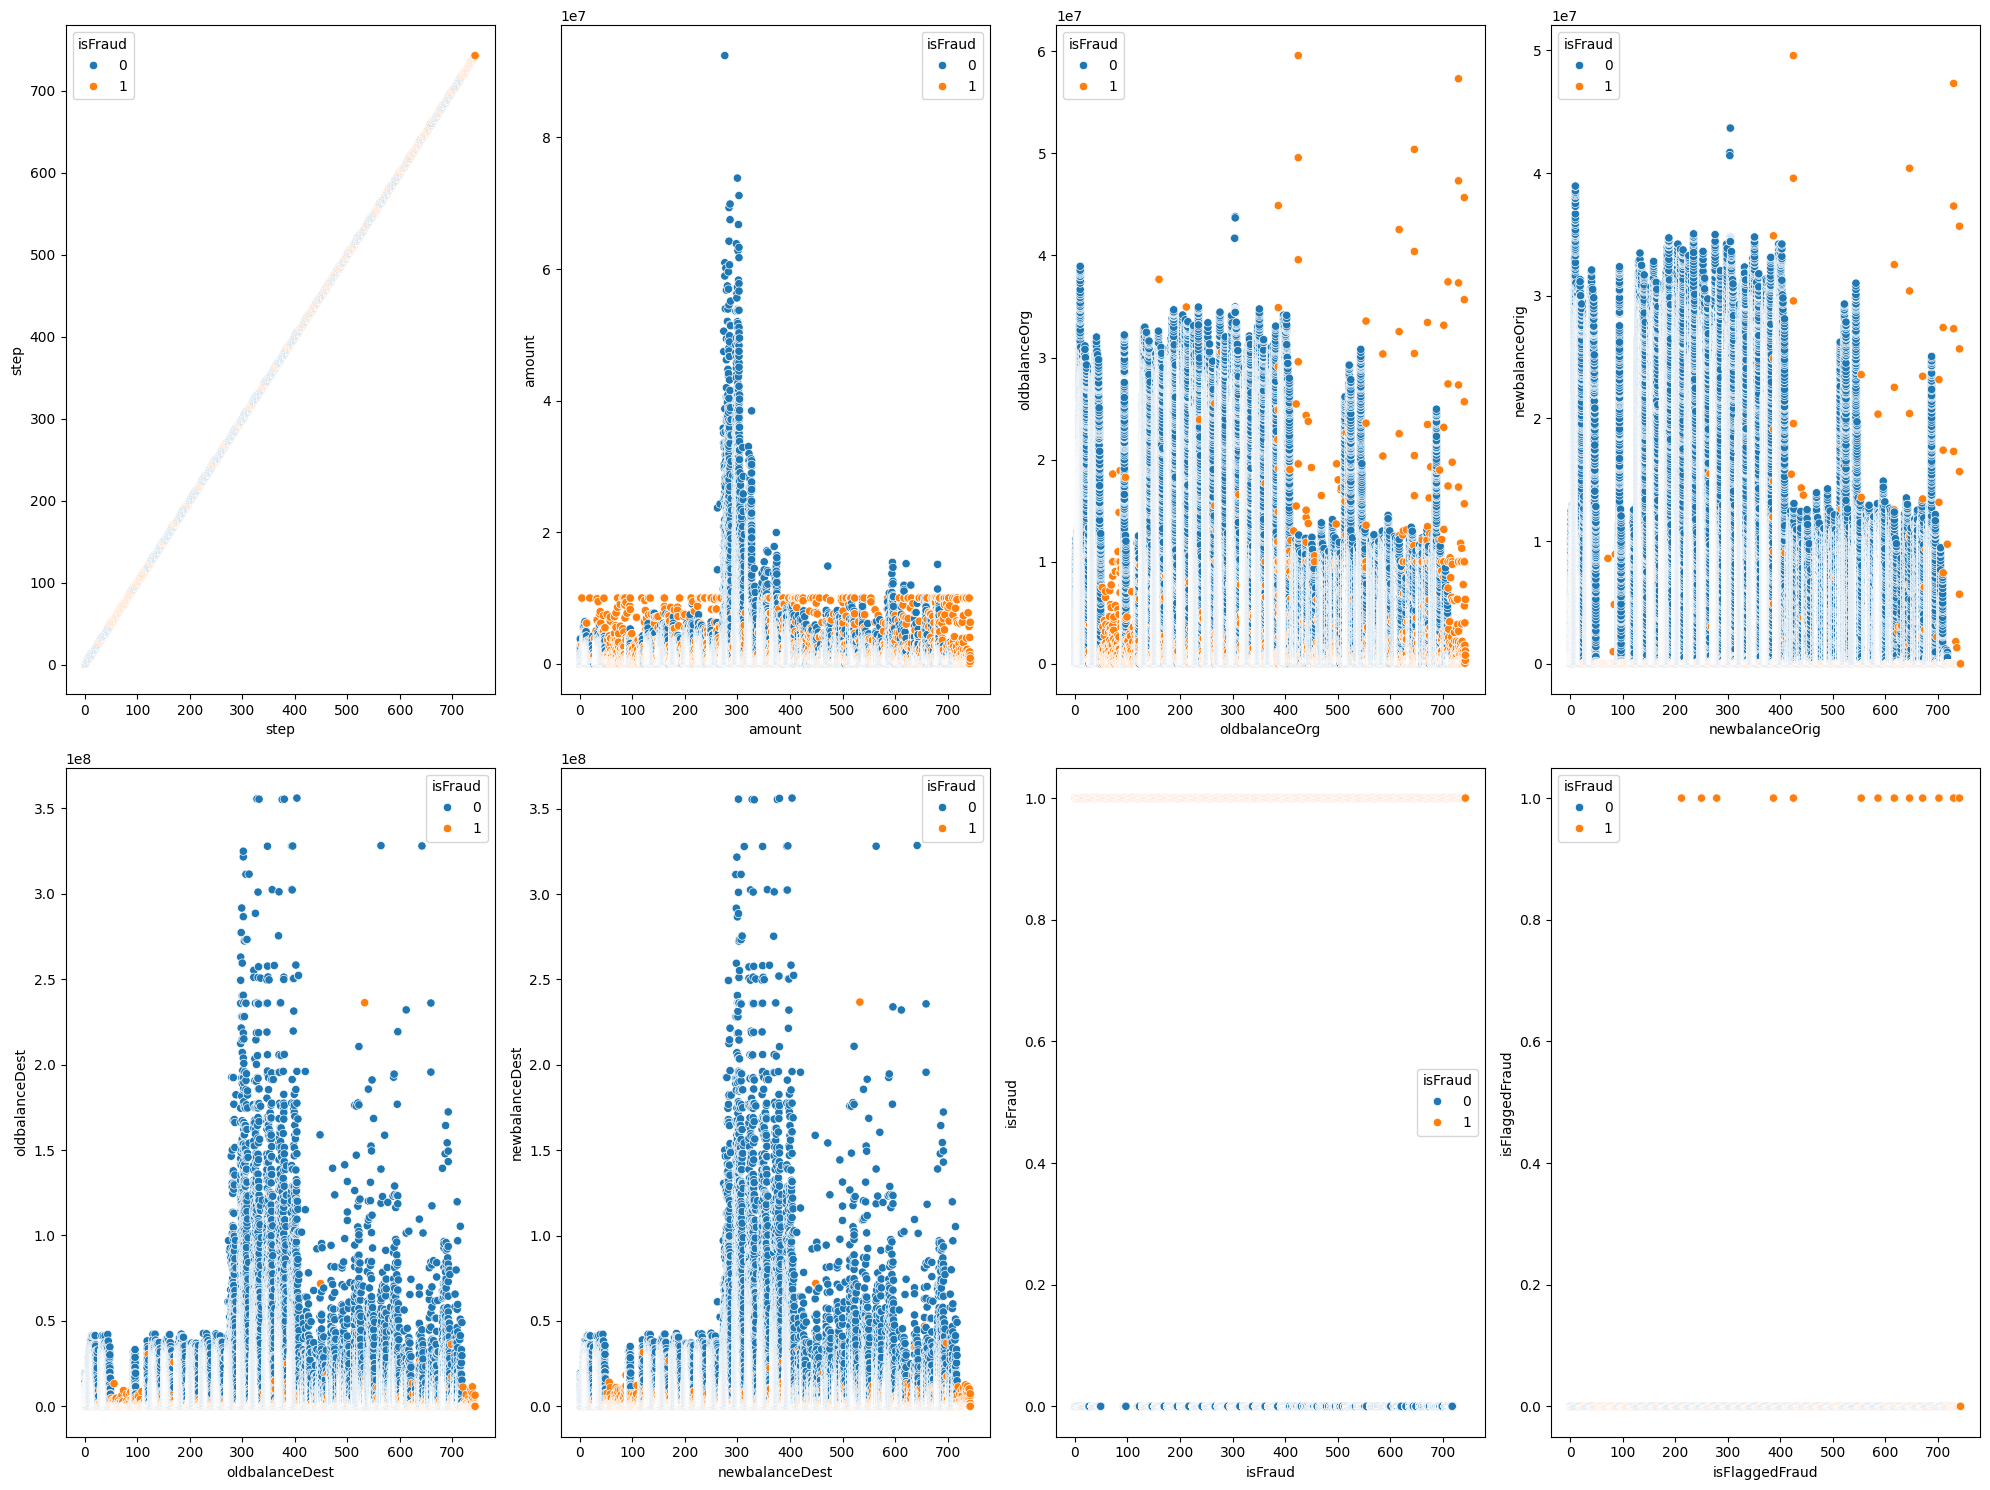

In [ ]:
plt.figure(figsize=(20,15))
plotnumber = 1

for col in num_col:
    if plotnumber<=len(num_col):
        ax = plt.subplot(2, 4, plotnumber)
        sns.scatterplot(x=df['step'],y=df[col],hue = df['isFraud'])
        plt.xlabel('step')
    plotnumber+=1

plt.tight_layout()
plt.show()

In [ ]:
## Multivariate Analysis

In [ ]:
sns.pairplot(df,hue='isFraud')
plt.show()

## Data Preperation

In [ ]:
## class imbalance Treatment

In [19]:
df['isFraud'].value_counts()

,count
isFraud,
0,6354407
1,8213


In [ ]:
## Target Encoding

In [7]:
under_sample = df[df['isFraud']==0].sample(df[df['isFraud']==1].shape[0])
sample_df = pd.concat([under_sample,df[df['isFraud']==1]],axis=0)
sample_df.reset_index(inplace=True)

In [9]:
sample_df

,index,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,5187045,361,CASH_OUT,132376.51,C1511556589,0.00,0.00,C1556293606,21251959.85,21384336.36,0,0
1,1302766,136,CASH_OUT,240716.50,C1972421816,0.00,0.00,C627509762,1170651.07,1411367.57,0,0
2,337612,16,CASH_IN,164261.67,C1469927699,3642904.67,3807166.34,C1355480709,165292.00,0.00,0,0
3,807751,40,PAYMENT,6896.89,C1035361753,177491.08,170594.20,M874755239,0.00,0.00,0,0
4,1111126,130,CASH_IN,202560.45,C489068438,203003.00,405563.45,C276630442,234506.43,456122.45,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
16421,6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
16422,6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
16423,6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
16424,6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [10]:
sample_df['nameOrig_new']  = sample_df['nameOrig'].apply(lambda x : x[0])
sample_df['nameDest_new']  = sample_df['nameDest'].apply(lambda x : x[0])

In [11]:
sample_df.drop(columns=['nameOrig','nameDest','isFlaggedFraud','index'],inplace=True)

In [12]:
sample_df

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,nameOrig_new,nameDest_new
0,361,CASH_OUT,132376.51,0.00,0.00,21251959.85,21384336.36,0,C,C
1,136,CASH_OUT,240716.50,0.00,0.00,1170651.07,1411367.57,0,C,C
2,16,CASH_IN,164261.67,3642904.67,3807166.34,165292.00,0.00,0,C,C
3,40,PAYMENT,6896.89,177491.08,170594.20,0.00,0.00,0,C,M
4,130,CASH_IN,202560.45,203003.00,405563.45,234506.43,456122.45,0,C,C
...,...,...,...,...,...,...,...,...,...,...
16421,743,CASH_OUT,339682.13,339682.13,0.00,0.00,339682.13,1,C,C
16422,743,TRANSFER,6311409.28,6311409.28,0.00,0.00,0.00,1,C,C
16423,743,CASH_OUT,6311409.28,6311409.28,0.00,68488.84,6379898.11,1,C,C
16424,743,TRANSFER,850002.52,850002.52,0.00,0.00,0.00,1,C,C


In [13]:
sample_df['nameOrig_new'].value_counts()

,count
nameOrig_new,
C,16426


In [14]:
sample_df.drop('nameOrig_new',axis=1,inplace=True)

In [15]:
sample_df

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,nameDest_new
0,361,CASH_OUT,132376.51,0.00,0.00,21251959.85,21384336.36,0,C
1,136,CASH_OUT,240716.50,0.00,0.00,1170651.07,1411367.57,0,C
2,16,CASH_IN,164261.67,3642904.67,3807166.34,165292.00,0.00,0,C
3,40,PAYMENT,6896.89,177491.08,170594.20,0.00,0.00,0,M
4,130,CASH_IN,202560.45,203003.00,405563.45,234506.43,456122.45,0,C
...,...,...,...,...,...,...,...,...,...
16421,743,CASH_OUT,339682.13,339682.13,0.00,0.00,339682.13,1,C
16422,743,TRANSFER,6311409.28,6311409.28,0.00,0.00,0.00,1,C
16423,743,CASH_OUT,6311409.28,6311409.28,0.00,68488.84,6379898.11,1,C
16424,743,TRANSFER,850002.52,850002.52,0.00,0.00,0.00,1,C


In [16]:
cat_col = []
for col in sample_df.columns:
  if sample_df[col].dtypes == 'object':
    cat_col.append(col)

In [17]:
cat_col

['type', 'nameDest_new']

In [18]:
from sklearn.preprocessing import TargetEncoder
for col in cat_col:
  encoder = TargetEncoder()
  sample_df[f'new{col}'] = encoder.fit_transform(sample_df[[col]],sample_df['isFraud'])

In [19]:
sample_df

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,nameDest_new,newtype,newnameDest_new
0,361,CASH_OUT,132376.51,0.00,0.00,21251959.85,21384336.36,0,C,0.583275,0.601621
1,136,CASH_OUT,240716.50,0.00,0.00,1170651.07,1411367.57,0,C,0.583275,0.600210
2,16,CASH_IN,164261.67,3642904.67,3807166.34,165292.00,0.00,0,C,0.000000,0.601786
3,40,PAYMENT,6896.89,177491.08,170594.20,0.00,0.00,0,M,0.000000,0.000000
4,130,CASH_IN,202560.45,203003.00,405563.45,234506.43,456122.45,0,C,0.000000,0.601144
...,...,...,...,...,...,...,...,...,...,...,...
16421,743,CASH_OUT,339682.13,339682.13,0.00,0.00,339682.13,1,C,0.583275,0.599225
16422,743,TRANSFER,6311409.28,6311409.28,0.00,0.00,0.00,1,C,0.863639,0.601621
16423,743,CASH_OUT,6311409.28,6311409.28,0.00,68488.84,6379898.11,1,C,0.583571,0.601144
16424,743,TRANSFER,850002.52,850002.52,0.00,0.00,0.00,1,C,0.861887,0.600210


In [20]:
sample_df.drop(['type','nameDest_new'],axis=1,inplace=True)

In [21]:
sample_df

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,newtype,newnameDest_new
0,361,132376.51,0.00,0.00,21251959.85,21384336.36,0,0.583275,0.601621
1,136,240716.50,0.00,0.00,1170651.07,1411367.57,0,0.583275,0.600210
2,16,164261.67,3642904.67,3807166.34,165292.00,0.00,0,0.000000,0.601786
3,40,6896.89,177491.08,170594.20,0.00,0.00,0,0.000000,0.000000
4,130,202560.45,203003.00,405563.45,234506.43,456122.45,0,0.000000,0.601144
...,...,...,...,...,...,...,...,...,...
16421,743,339682.13,339682.13,0.00,0.00,339682.13,1,0.583275,0.599225
16422,743,6311409.28,6311409.28,0.00,0.00,0.00,1,0.863639,0.601621
16423,743,6311409.28,6311409.28,0.00,68488.84,6379898.11,1,0.583571,0.601144
16424,743,850002.52,850002.52,0.00,0.00,0.00,1,0.861887,0.600210


In [22]:
sample_df.corr()['isFraud']

,isFraud
step,0.327141
amount,0.343182
oldbalanceOrg,0.120944
newbalanceOrig,-0.133851
oldbalanceDest,-0.092031
newbalanceDest,0.006002
isFraud,1.000000
newtype,0.667708
newnameDest_new,0.448979


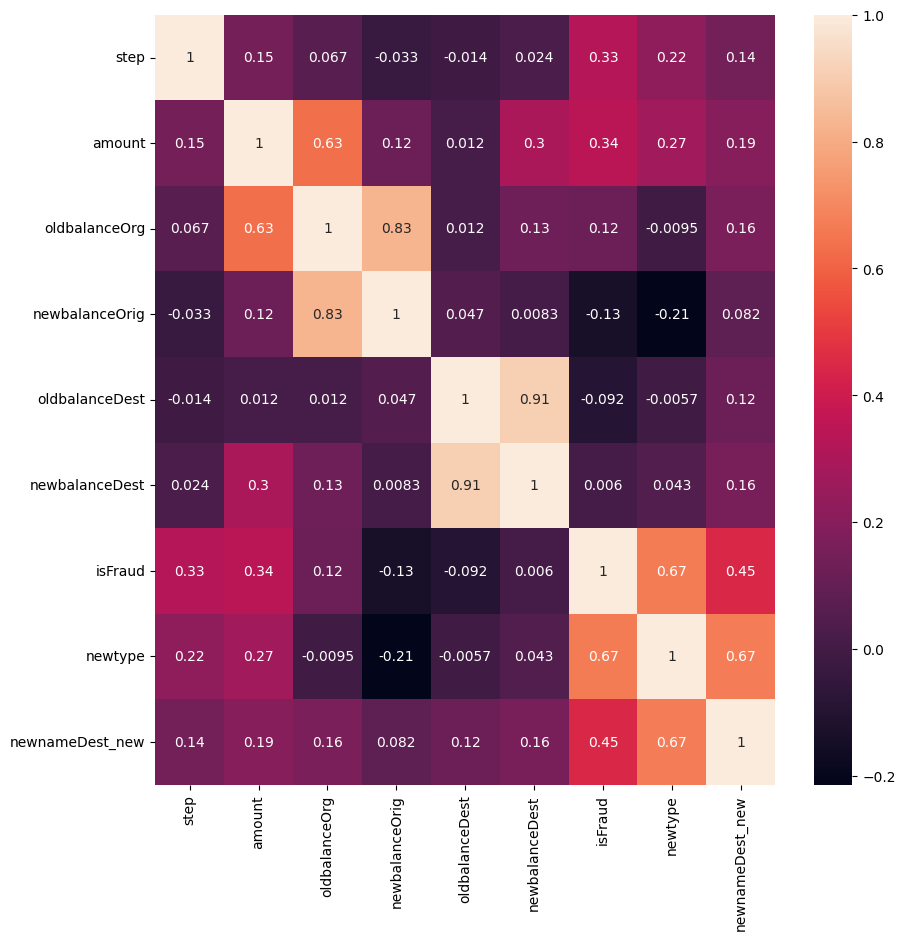

In [23]:
plt.figure(figsize=(10,10))
sns.heatmap(sample_df.corr(),annot=True)
plt.show()

In [23]:
## split the dataset into X and y

In [24]:
X = sample_df.drop(columns=['isFraud'])
y = sample_df['isFraud']

In [25]:
X

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,newtype,newnameDest_new
0,361,132376.51,0.00,0.00,21251959.85,21384336.36,0.583275,0.601621
1,136,240716.50,0.00,0.00,1170651.07,1411367.57,0.583275,0.600210
2,16,164261.67,3642904.67,3807166.34,165292.00,0.00,0.000000,0.601786
3,40,6896.89,177491.08,170594.20,0.00,0.00,0.000000,0.000000
4,130,202560.45,203003.00,405563.45,234506.43,456122.45,0.000000,0.601144
...,...,...,...,...,...,...,...,...
16421,743,339682.13,339682.13,0.00,0.00,339682.13,0.583275,0.599225
16422,743,6311409.28,6311409.28,0.00,0.00,0.00,0.863639,0.601621
16423,743,6311409.28,6311409.28,0.00,68488.84,6379898.11,0.583571,0.601144
16424,743,850002.52,850002.52,0.00,0.00,0.00,0.861887,0.600210


In [ ]:
## generating train,test,val sets

In [26]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)
X_train,X_val,y_train,y_val = train_test_split(X_train,y_train,test_size=0.2,random_state=1)
print('Train is : ',X_train.shape,y_train.shape)
print('Validation is : ',X_val.shape,y_val.shape)
print('Test is : ',X_test.shape,y_test.shape)

Train is :  (10512, 8) (10512,)
Validation is :  (2628, 8) (2628,)
Test is :  (3286, 8) (3286,)


In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [28]:
y_pred = model.predict(X_val)
result_df = pd.DataFrame({'Actual':y_val,'Predicted':y_pred})
result_df

,Actual,Predicted
10140,1,1
1246,0,0
14153,1,1
7634,0,0
7956,0,0
...,...,...
4870,0,0
15517,1,1
10056,1,1
13016,1,0


In [29]:
print(accuracy_score(y_val,y_pred))
print(confusion_matrix(y_val,y_pred))
print(classification_report(y_val,y_pred))

0.9067732115677322
[[1192  112]
 [ 133 1191]]
              precision    recall  f1-score   support

           0       0.90      0.91      0.91      1304
           1       0.91      0.90      0.91      1324

    accuracy                           0.91      2628
   macro avg       0.91      0.91      0.91      2628
weighted avg       0.91      0.91      0.91      2628



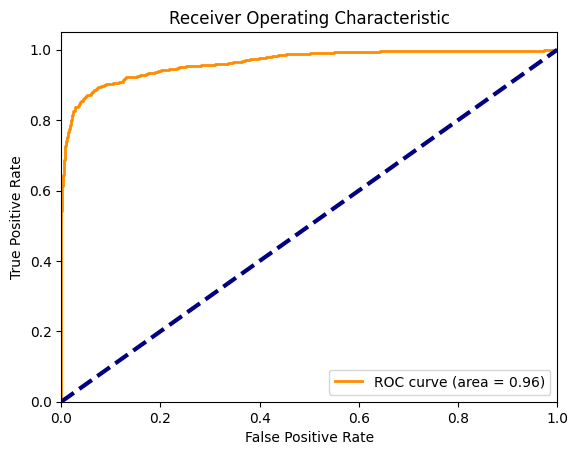

In [30]:
from sklearn.metrics import roc_curve, auc
y_probs = model.predict_proba(X_val)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_val, y_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [31]:
## checking for multicollinearity

## multicollinearity

In [32]:
s_df = sample_df.copy()

In [33]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame({'Feature':s_df.drop(columns=['isFraud'],axis=1).columns})
vif['vif'] = [variance_inflation_factor(s_df.drop(columns=['isFraud']).values,i) for i in range(s_df.drop(columns=['isFraud']).shape[1])]
vif.sort_values(by ='vif',ascending=False)

,Feature,vif
2,oldbalanceOrg,53.748320
3,newbalanceOrig,29.701309
1,amount,21.195297
5,newbalanceDest,13.983129
4,oldbalanceDest,11.624853
7,newnameDest_new,8.921826
6,newtype,7.945810
0,step,2.894155


In [34]:
## From the vif value it's clear that multicollinearity exists so we drop feature one by one to get rid of it

In [35]:
s_df.drop('oldbalanceOrg',axis=1,inplace=True)

In [36]:
vif = pd.DataFrame({'Feature':s_df.drop(columns=['isFraud'],axis=1).columns})
vif['vif'] = [variance_inflation_factor(s_df.drop(columns=['isFraud']).values,i) for i in range(s_df.drop(columns=['isFraud']).shape[1])]
vif.sort_values(by ='vif',ascending=False)

,Feature,vif
4,newbalanceDest,13.317500
3,oldbalanceDest,11.357698
6,newnameDest_new,8.871609
5,newtype,7.939601
0,step,2.885071
1,amount,2.727685
2,newbalanceOrig,1.381583


In [37]:
s_df.drop('newbalanceDest',axis=1,inplace=True)

In [38]:
vif = pd.DataFrame({'Feature':s_df.drop(columns=['isFraud'],axis=1).columns})
vif['vif'] = [variance_inflation_factor(s_df.drop(columns=['isFraud']).values,i) for i in range(s_df.drop(columns=['isFraud']).shape[1])]
vif.sort_values(by ='vif',ascending=False)

,Feature,vif
5,newnameDest_new,8.522205
4,newtype,7.506765
0,step,2.885066
1,amount,1.348512
2,newbalanceOrig,1.259471
3,oldbalanceDest,1.104503


In [39]:
X = s_df.drop(columns=['isFraud'])
y = s_df['isFraud']

In [40]:
X

,step,amount,newbalanceOrig,oldbalanceDest,newtype,newnameDest_new
0,361,132376.51,0.00,21251959.85,0.583275,0.601621
1,136,240716.50,0.00,1170651.07,0.583275,0.600210
2,16,164261.67,3807166.34,165292.00,0.000000,0.601786
3,40,6896.89,170594.20,0.00,0.000000,0.000000
4,130,202560.45,405563.45,234506.43,0.000000,0.601144
...,...,...,...,...,...,...
16421,743,339682.13,0.00,0.00,0.583275,0.599225
16422,743,6311409.28,0.00,0.00,0.863639,0.601621
16423,743,6311409.28,0.00,68488.84,0.583571,0.601144
16424,743,850002.52,0.00,0.00,0.861887,0.600210


In [41]:
y

,isFraud
0,0
1,0
2,0
3,0
4,0
...,...
16421,1
16422,1
16423,1
16424,1


In [42]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)
X_train,X_val,y_train,y_val = train_test_split(X_train,y_train,test_size=0.2,random_state=1)
print('Train is : ',X_train.shape,y_train.shape)
print('Validation is : ',X_val.shape,y_val.shape)
print('Test is : ',X_test.shape,y_test.shape)

Train is :  (10512, 6) (10512,)
Validation is :  (2628, 6) (2628,)
Test is :  (3286, 6) (3286,)


## Logistic Regression



*   Reason for Choice: Logistic Regression was initially selected due to its simplicity and effectiveness in cases where there is a linear relationship between the features and the target variable. This is often a good starting point for classification problems.

*  Performance: The model achieved an accuracy of 69.77%. While this provides a baseline performance, it might not be sufficient for more nuanced fraud detection tasks, given that fraud detection often involves complex patterns and imbalances in the dataset.



In [81]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [82]:
y_pred = model.predict(X_val)
result_df = pd.DataFrame({'Actual':y_val,'Predicted':y_pred})
result_df

,Actual,Predicted
10140,1,0
1246,0,1
14153,1,0
7634,0,1
7956,0,1
...,...,...
4870,0,0
15517,1,1
10056,1,1
13016,1,1


In [83]:
print(accuracy_score(y_val,y_pred))
print(confusion_matrix(y_val,y_pred))
print(classification_report(y_val,y_pred))

0.6902587519025876
[[ 597  707]
 [ 107 1217]]
              precision    recall  f1-score   support

           0       0.85      0.46      0.59      1304
           1       0.63      0.92      0.75      1324

    accuracy                           0.69      2628
   macro avg       0.74      0.69      0.67      2628
weighted avg       0.74      0.69      0.67      2628



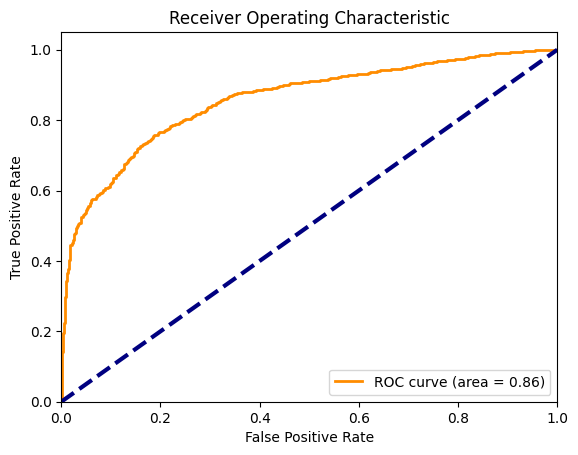

In [46]:
from sklearn.metrics import roc_curve, auc
y_probs = model.predict_proba(X_val)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_val, y_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

## Decision Tree Classifier



*   Reason for Choice: Decision Trees are powerful for capturing non-linear relationships and interactions between features, which might be present in fraud detection scenarios. They also allow for easier interpretation of feature importance.
*   Hyperparameter Tuning: I performed hyperparameter tuning to optimize the model's performance. This is crucial as it helps in finding the best configuration of parameters, such as the depth of the tree, minimum samples split, and others, which can significantly impact the model's accuracy


*   Performance: The Decision Tree Classifier achieved an accuracy of **90.03%,** indicating a substantial improvement over Logistic Regression. This suggests that the model better captures the complex patterns in the data.





In [48]:
from sklearn.tree import DecisionTreeClassifier
model2 = DecisionTreeClassifier(criterion='entropy')
model2.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [49]:
y_pred = model2.predict(X_val)
result_df = pd.DataFrame({'Actual':y_val,'Predicted':y_pred})
result_df

,Actual,Predicted
10140,1,1
1246,0,0
14153,1,1
7634,0,0
7956,0,0
...,...,...
4870,0,0
15517,1,1
10056,1,0
13016,1,1


In [50]:
print(accuracy_score(y_val,y_pred))
print(confusion_matrix(y_val,y_pred))
print(classification_report(y_val,y_pred))

0.8991628614916286
[[1197  107]
 [ 158 1166]]
              precision    recall  f1-score   support

           0       0.88      0.92      0.90      1304
           1       0.92      0.88      0.90      1324

    accuracy                           0.90      2628
   macro avg       0.90      0.90      0.90      2628
weighted avg       0.90      0.90      0.90      2628



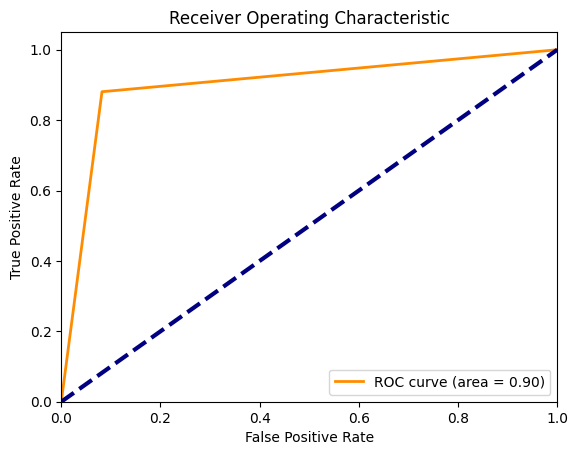

In [51]:
from sklearn.metrics import roc_curve, auc
y_probs = model2.predict_proba(X_val)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_val, y_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [52]:
## hyperparameter Tuning of Decision Tree
from sklearn.model_selection import RandomizedSearchCV

In [53]:
params = {
    'criterion':['entropy','gini'],
    'max_depth':[1,2,3,4,5,6,7,8,9,10],
    'min_samples_split':[2,3,4,5,6,7,8,9,10],
    'min_samples_leaf':[1,2,3,4,5,6,7,8,9,10]
}
estimator = DecisionTreeClassifier()
dt_cv = RandomizedSearchCV(estimator,param_distributions=params,cv=5,scoring='accuracy',verbose=3)
dt_cv.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END criterion=entropy, max_depth=7, min_samples_leaf=7, min_samples_split=7;, score=0.900 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=7, min_samples_leaf=7, min_samples_split=7;, score=0.906 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=7, min_samples_leaf=7, min_samples_split=7;, score=0.908 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=7, min_samples_leaf=7, min_samples_split=7;, score=0.909 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=7, min_samples_leaf=7, min_samples_split=7;, score=0.903 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=5, min_samples_leaf=5, min_samples_split=6;, score=0.893 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=5, min_samples_leaf=5, min_samples_split=6;, score=0.903 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=5, min_samples_leaf=5, min_samples_split=6;, score=0.897 total time=   

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                      10],
                                        'min_samples_leaf': [1, 2, 3, 4, 5, 6,
                                                             7, 8, 9, 10],
                                        'min_samples_split': [2, 3, 4, 5, 6, 7,
                                                              8, 9, 10]},
                   scoring='accuracy', verbose=3)

In [54]:
dt_cv.best_params_

{'min_samples_split': 5,
 'min_samples_leaf': 6,
 'max_depth': 10,
 'criterion': 'gini'}

In [55]:
dt_cv.best_score_

0.9158104977122529

In [56]:
y_pred = dt_cv.predict(X_val)
result_df = pd.DataFrame({'Actual':y_val,'Predicted':y_pred})
result_df

,Actual,Predicted
10140,1,1
1246,0,0
14153,1,1
7634,0,0
7956,0,0
...,...,...
4870,0,0
15517,1,1
10056,1,0
13016,1,1


In [57]:
print(accuracy_score(y_val,y_pred))
print(confusion_matrix(y_val,y_pred))
print(classification_report(y_val,y_pred))

0.9105783866057838
[[1253   51]
 [ 184 1140]]
              precision    recall  f1-score   support

           0       0.87      0.96      0.91      1304
           1       0.96      0.86      0.91      1324

    accuracy                           0.91      2628
   macro avg       0.91      0.91      0.91      2628
weighted avg       0.91      0.91      0.91      2628



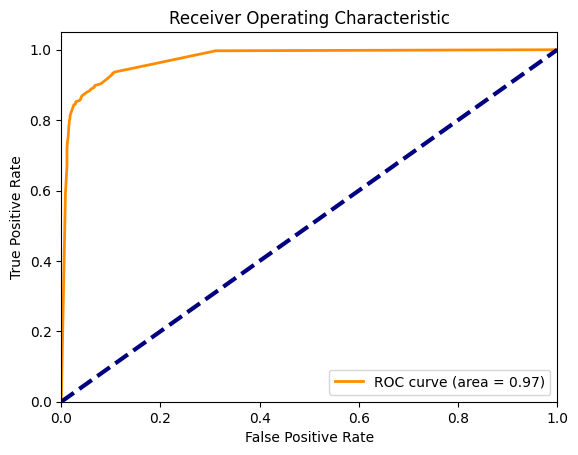

In [58]:
from sklearn.metrics import roc_curve, auc
y_probs = dt_cv.predict_proba(X_val)[:, 1]

fpr, tpr, thresholds = roc_curve(y_val, y_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

## Support Vector Machine



*   Reason for Choice: SVC is known for its effectiveness in high-dimensional
spaces and its ability to model complex boundaries between classes. It can handle non-linear relationships through the kernel trick.


*  Performance: The SVC model provided an accuracy of 89.00%. This is quite competitive with the Decision Tree model, showing that SVC is also effective for this task, though slightly less accurate than the Decision Tree model in our case.





In [60]:

from sklearn.preprocessing import StandardScaler

In [61]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [62]:
from sklearn.svm import SVC
model3 = SVC(C=0.1,kernel='linear',probability=True)
model3

SVC(C=0.1, kernel='linear', probability=True)

In [63]:
model3.fit(X_train_scaled,y_train)

SVC(C=0.1, kernel='linear', probability=True)

In [64]:
y_pred = model3.predict(X_val_scaled)
result_df = pd.DataFrame({'Actual':y_val,'Predicted':y_pred})
result_df

,Actual,Predicted
10140,1,0
1246,0,0
14153,1,0
7634,0,0
7956,0,0
...,...,...
4870,0,0
15517,1,1
10056,1,0
13016,1,1


In [65]:
print(accuracy_score(y_val,y_pred))
print(confusion_matrix(y_val,y_pred))
print(classification_report(y_val,y_pred))

0.83675799086758
[[1086  218]
 [ 211 1113]]
              precision    recall  f1-score   support

           0       0.84      0.83      0.84      1304
           1       0.84      0.84      0.84      1324

    accuracy                           0.84      2628
   macro avg       0.84      0.84      0.84      2628
weighted avg       0.84      0.84      0.84      2628



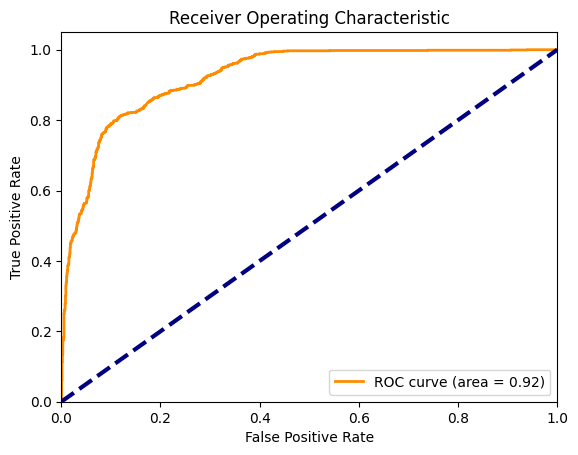

In [66]:
from sklearn.metrics import roc_curve, auc
y_probs = model3.predict_proba(X_val_scaled)[:, 1]

fpr, tpr, thresholds = roc_curve(y_val, y_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [99]:
## Hyperparameter tuning of SVC

In [67]:
params={
    'C':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1],
    'kernel':['linear','poly','rbf','sigmoid'],
    'gamma':[1,0.1,0.01,0.001,0.0001],
    'degree':[1,2,3,4,5,6,7,8,9,10],
    'coef0':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1],

}
model = SVC(probability=True)
cv = RandomizedSearchCV(model,param_distributions=params,cv=5,scoring='accuracy',verbose=3)
cv.fit(X_train_scaled,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END C=0.7, coef0=0.3, degree=1, gamma=0.1, kernel=poly;, score=0.840 total time=   7.6s
[CV 2/5] END C=0.7, coef0=0.3, degree=1, gamma=0.1, kernel=poly;, score=0.847 total time=   5.4s
[CV 3/5] END C=0.7, coef0=0.3, degree=1, gamma=0.1, kernel=poly;, score=0.845 total time=   6.5s
[CV 4/5] END C=0.7, coef0=0.3, degree=1, gamma=0.1, kernel=poly;, score=0.843 total time=   6.1s
[CV 5/5] END C=0.7, coef0=0.3, degree=1, gamma=0.1, kernel=poly;, score=0.839 total time=   5.2s
[CV 1/5] END C=0.5, coef0=1, degree=7, gamma=0.01, kernel=linear;, score=0.843 total time=   8.5s
[CV 2/5] END C=0.5, coef0=1, degree=7, gamma=0.01, kernel=linear;, score=0.848 total time=   6.2s
[CV 3/5] END C=0.5, coef0=1, degree=7, gamma=0.01, kernel=linear;, score=0.847 total time=   7.9s
[CV 4/5] END C=0.5, coef0=1, degree=7, gamma=0.01, kernel=linear;, score=0.845 total time=   6.7s
[CV 5/5] END C=0.5, coef0=1, degree=7, gamma=0.01, kernel=line

RandomizedSearchCV(cv=5, estimator=SVC(probability=True),
                   param_distributions={'C': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7,
                                              0.8, 0.9, 1],
                                        'coef0': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6,
                                                  0.7, 0.8, 0.9, 1],
                                        'degree': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                   10],
                                        'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                                        'kernel': ['linear', 'poly', 'rbf',
                                                   'sigmoid']},
                   scoring='accuracy', verbose=3)

In [68]:
cv.best_params_

{'kernel': 'poly', 'gamma': 1, 'degree': 4, 'coef0': 0.2, 'C': 0.9}

In [69]:
cv.best_score_

0.8963097437261707

In [70]:
y_pred = cv.predict(X_val_scaled)
result_df = pd.DataFrame({'Actual':y_val,'Predicted':y_pred})
result_df

,Actual,Predicted
10140,1,1
1246,0,0
14153,1,1
7634,0,0
7956,0,0
...,...,...
4870,0,0
15517,1,1
10056,1,1
13016,1,1


In [71]:
print(accuracy_score(y_val,y_pred))
print(confusion_matrix(y_val,y_pred))
print(classification_report(y_val,y_pred))

0.8907914764079148
[[1250   54]
 [ 233 1091]]
              precision    recall  f1-score   support

           0       0.84      0.96      0.90      1304
           1       0.95      0.82      0.88      1324

    accuracy                           0.89      2628
   macro avg       0.90      0.89      0.89      2628
weighted avg       0.90      0.89      0.89      2628



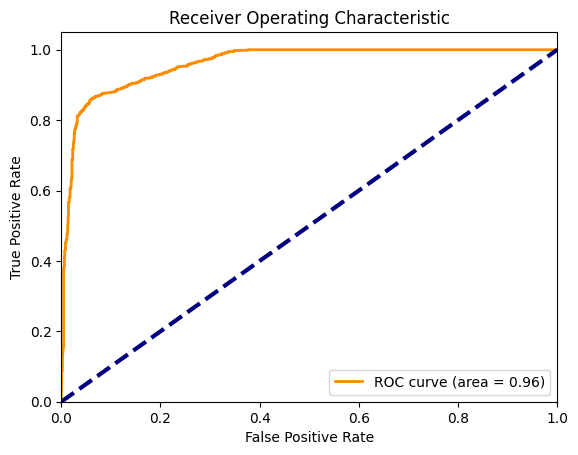

In [72]:
from sklearn.metrics import roc_curve, auc
y_probs = cv.predict_proba(X_val_scaled)[:, 1]


fpr, tpr, thresholds = roc_curve(y_val, y_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

## Demonstrate the performance of the model by using best set of tools.

In [124]:
## Model Performance on Test Data

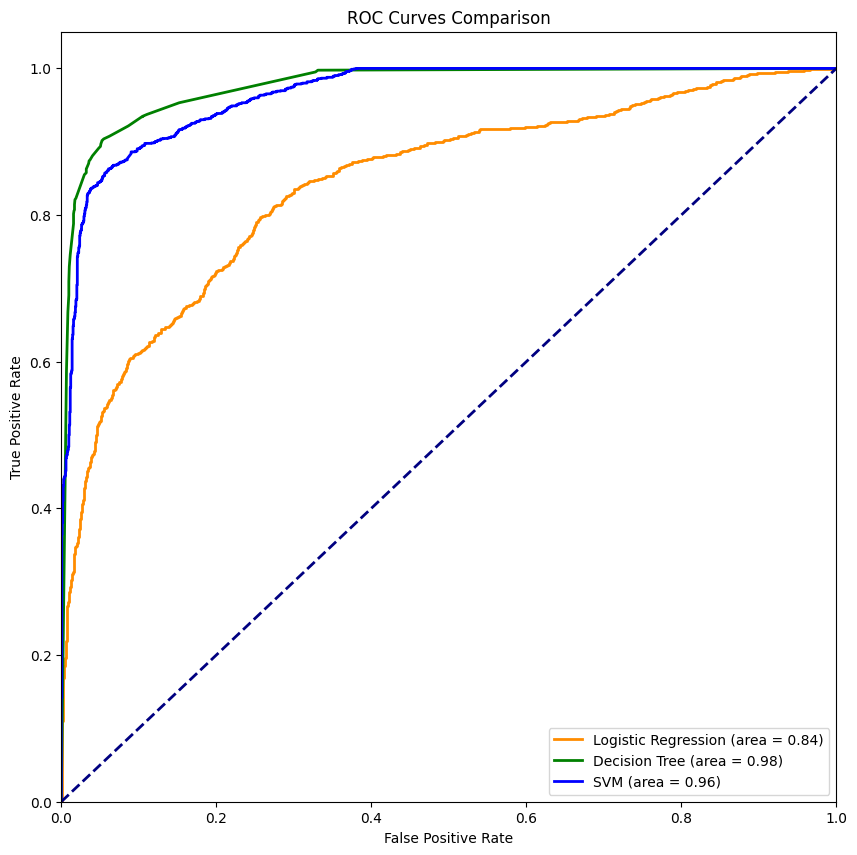

In [84]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(10, 10))

# Logistic Regression ROC curve
y_probs_logistic = model.predict_proba(X_test)[:, 1]
fpr_logistic, tpr_logistic, _ = roc_curve(y_test, y_probs_logistic)
roc_auc_logistic = auc(fpr_logistic, tpr_logistic)
plt.plot(fpr_logistic, tpr_logistic, color='darkorange', lw=2, label=f'Logistic Regression (area = {roc_auc_logistic:.2f})')

# Decision Tree ROC curve
y_probs_dt = dt_cv.predict_proba(X_test)[:, 1]
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_probs_dt)
roc_auc_dt = auc(fpr_dt, tpr_dt)
plt.plot(fpr_dt, tpr_dt, color='green', lw=2, label=f'Decision Tree (area = {roc_auc_dt:.2f})')

# SVM ROC curve
y_probs_svm = cv.predict_proba(X_test_scaled)[:, 1]
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_probs_svm)
roc_auc_svm = auc(fpr_svm, tpr_svm)
plt.plot(fpr_svm, tpr_svm, color='blue', lw=2, label=f'SVM (area = {roc_auc_svm:.2f})')


plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

# Labels and title
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves Comparison')
plt.legend(loc="lower right")

# Show the plot
plt.show()


In [85]:
## Overall, the Decision Tree Classifier emerged as the best-performing model in our experiments.

## How did you select variables to be included in the model?

*   Correlation Analysis: Helped in identifying features that are strongly related to the target variable.
*   VIF Calculation: Allowed you to address multicollinearity by removing features that were highly correlated with others.
*   Feature Selection: Based on the results from these analyses, you selected features that were both relevant and independent, leading to a more effective and stable model.





## What are the key factors that predict fraudulent customer?

In [87]:
s_df.corr()['isFraud']

,isFraud
step,0.327141
amount,0.343182
newbalanceOrig,-0.133851
oldbalanceDest,-0.092031
isFraud,1.000000
newtype,0.667708
newnameDest_new,0.448979



1.   Most Influential Features: newtype and newnameDest_new are the most significant predictors of fraud based on correlation.
2.   Additional Consideration: amount also has a meaningful correlation and should be considered in conjunction with the other features.
*   Less Influential Features: step, newbalanceOrig, and oldbalanceDest have weaker correlations with the target variable, making them less influential but still potentially useful in the model.





## Do these factors make sense? If yes, How? If not, How not?



*   type :  This feature, representing the type of transaction or action, is a crucial predictor. Different types of transactions may have varying risks associated with them. For example, transactions involving new or unusual types of actions could be more likely to indicate fraudulent behavior. This aligns with common fraud detection practices where the nature of the transaction is a key factor

*   nameDest: The name of the destination account being a strong predictor is logical. Fraudulent transactions might involve accounts with names that appear suspicious or are newly created. If the destination account name frequently changes or is atypical, it might be a red flag. This aligns with the idea that fraudulent activities often involve suspicious or unfamiliar entities.


*   amount : The transaction amount is a reasonable predictor of fraud. Large or unusual transactions are often more likely to be scrutinized or flagged for fraud. In many fraud detection systems, transaction amounts are used to identify anomalies or suspicious activities. Thus, a moderate correlation with fraud is expected and aligns with practical fraud detection practices

* newbalanceOrig : The weak negative correlation suggests that the new balance of the original account has a minimal impact on fraud detection. In many fraud cases, changes in balance might not be as directly indicative of fraud compared to other features. This could be due to various reasons such as the specific context of the transactions or the nature of the balance changes

*   oldbalanceDest :  The very weak negative correlation with fraud indicates that the old balance of the destination account is not a significant predictor. This might be because historical balances might not be as relevant to the immediate detection of fraud as other features.

*   step : While not as strong, the step feature can still be relevant. This could represent the sequence or stage of a transaction process, and anomalies or deviations in this process might be indicative of fraud. Although its correlation is moderate, it could still provide useful context in a more complex fraud detection model






## What kind of prevention should be adopted while company update its infrastructure?

**To prevent fraud while updating your infrastructure, focus on strengthening security with real-time monitoring, multi-factor authentication, and encryption. Use advanced technology to detect fraud, ensure your infrastructure can grow with your business, and manage data wisely. Educate both employees and customers, create strong fraud policies, collaborate with others, and regularly review your systems to stay ahead of potential threats**

## Assuming these actions have been implemented, how would you determine if they work?

**To determine if your fraud prevention measures are working, track key performance indicators, review incident reports, conduct regular audits, and evaluate system performance. Gather feedback from employees and customers, ensure compliance with regulations, perform stress testing, and review the financial impact of fraud. These steps will help you assess the effectiveness of your measures and make necessary adjustments to improve them.**








